In [1]:
# function created for this report
import wrangle_zillow
import explore
import model
# libraries 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
import seaborn as sns
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt

# Project Overview and Goals
- The project's general idea is to find out what drives the house tax value, this project will contains several different files. 
    * The first will be the acquiring and cleaning file, which gives us a glance of the data we will going to explore next; 
    * The second will be our exploring file, which gives us the opportunity to discovering, assuming and reasoning; 
    * The third will be our modeling, which lets us to predict the house price with the best model.
- The first goal for this project is to explore the database, and find out what drives the house tax market.
- The second goal for this project is to predict the future with our existing known information.
- The third goal is to provide recommendations to a improve our prediction.

# Acquire and Prepare Data

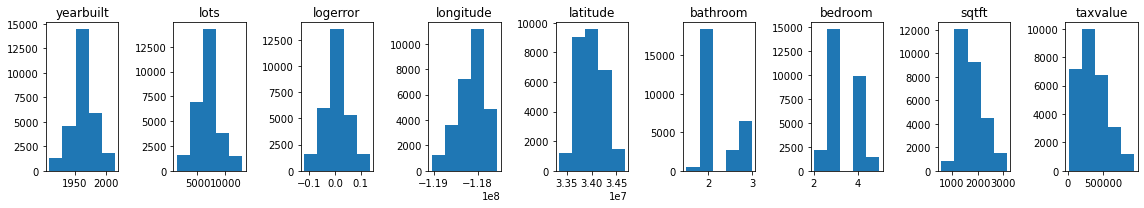

In [2]:
# The original data has outliers and some null values. the wrangle module removed outlers and dropped the null values
# The wrangle module created has a function that split the data to train, validate, and test.
# The wrangle module created month from transaction date and drop the transaction date 
zillow_train, zillow_validate, zillow_test=wrangle_zillow.wrangle_zillow(1.5)

In [3]:
# Retrieved some basic information about the data
zillow_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15744 entries, 41701 to 14740
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yearbuilt  15744 non-null  float64
 1   lots       15744 non-null  float64
 2   logerror   15744 non-null  float64
 3   longitude  15744 non-null  float64
 4   latitude   15744 non-null  float64
 5   bathroom   15744 non-null  float64
 6   bedroom    15744 non-null  float64
 7   fips       15744 non-null  object 
 8   sqtft      15744 non-null  float64
 9   zipcode    15744 non-null  object 
 10  taxvalue   15744 non-null  float64
 11  county     15744 non-null  object 
 12  month      15744 non-null  int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 1.7+ MB


### Key Takeaway soooo far
- The bathroom, bedroom, sqtft, and lots size can be scaled.
- The wrangle also created three objects, which translate the fips into county, the zipcode, and fips into object.
- The data contains longitude and latitude, which could helps us to illustrate the location of the house hue by county using scatter plot
- Drop transaction date and only keep month since all transactions are in 2017
- The wrangle function also drop null values, the reason is that the data set is large enough without worry it will cause significant impact on the modeling or exploration.

In [4]:
# scale the data with MinMaxScaler for a better understanding
scaler,zillow_train_scaled=wrangle_zillow.scale(MinMaxScaler(),zillow_train)

In [5]:
zillow_train_scaled.county.value_counts()

Los Angeles County, CA    9855
Orange County, CA         4982
Ventura County, CA         907
Name: county, dtype: int64

In [6]:
# use describe to learn more about the dataframe 
zillow_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
yearbuilt,15744.0,1.963347e+03,17.975842,1.909000e+03,1.953000e+03,1.961000e+03,1.975000e+03,2.015000e+03
lots,15744.0,4.753254e-01,0.174365,0.000000e+00,3.748406e-01,4.599660e-01,5.595623e-01,1.000000e+00
logerror,15744.0,6.224927e-03,0.046429,-1.201488e-01,-2.152451e-02,5.895405e-03,3.291749e-02,1.349226e-01
longitude,15744.0,-1.181429e+08,310915.083001,-1.190481e+08,-1.183674e+08,-1.180897e+08,-1.179113e+08,-1.175571e+08
latitude,15744.0,3.398529e+07,243413.543469,3.339476e+07,3.380937e+07,3.396868e+07,3.416839e+07,3.466807e+07
bathroom,15744.0,5.135925e-01,0.289707,0.000000e+00,3.333333e-01,3.333333e-01,6.666667e-01,1.000000e+00
bedroom,15744.0,4.591802e-01,0.232755,0.000000e+00,3.333333e-01,3.333333e-01,6.666667e-01,1.000000e+00
sqtft,15744.0,4.552647e-01,0.183024,0.000000e+00,3.136719e-01,4.195313e-01,5.700195e-01,1.000000e+00
taxvalue,15744.0,3.496313e+05,201663.920390,1.840500e+04,1.973785e+05,3.235035e+05,4.742838e+05,9.443240e+05
month,15744.0,5.107597e+00,2.300680,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00


### Key Takeaway for Acquire and prepared data
- The data showed about 15744 data rows
- The Los Angeles County in CA has the highest transaction volume in 2017
- The transaction month only from Januaray to September
- Data is split and scaled for our exploration process with each unique name to prevent data leakage, and easy access.

# Explore

### Takeaway before the takeaway
- The inital suspect on what drive the market tax value could be the house location.
- The first question is where are those county located, and how many bedroom count are there
- The already created explore.py file will be used in this exploration process

### Question 1
Whether the counties have significant different on the bedroom count

(None, None)

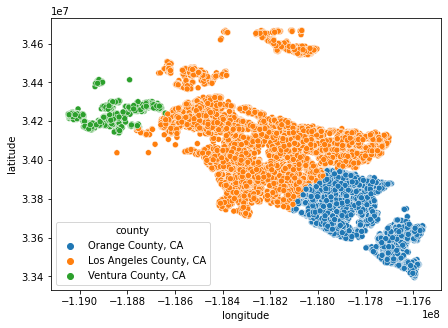

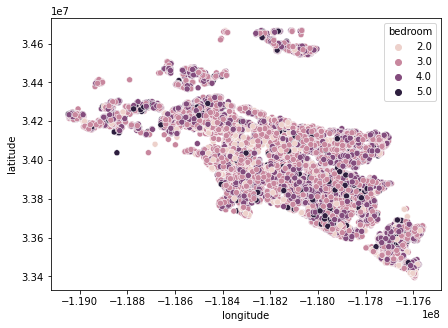

In [7]:
# the explore.py has created a visulized information. 
# The functions are l_county and bedroom_w_county. This is what we are going to use for this explore
explore.l_county(zillow_train),explore.bedroom_w_county(zillow_train)

## Key Takeaway
- The bedroom has no significant different spread out each county. Which denied the initial assumption that the bedroom plays significant role with county taxvalue.
- However, we do find out that Los Angeles County is significant larger than the other two counties, which validated the reason why Los Angeles county has more transaction than other two counties.

### Question 2
- Whether the month is impacting the taxvalue?

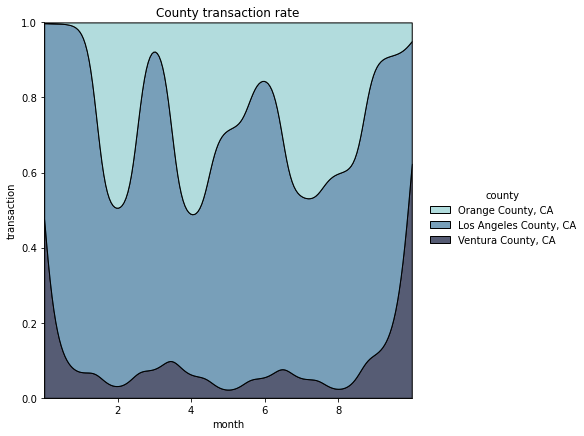

In [8]:
explore.differentrate(zillow_train)

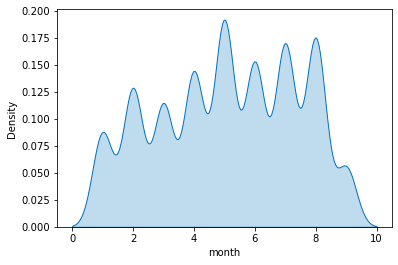

In [9]:
explore.tax_per_month(zillow_train)

## Key Takeaway
- In Januaray, Los Angeles and orange county are the highest transaction volume, but the tax value was low
- The similar scenario happened in the September
- The highest tax value is in May as the graph depicted, and which the orange county was involved with the transaction
- The orange county has the highest tax value, which presumed to have the most impact on the tax value

## Summary of the exploration by far
- The orange county might have significant impact on the overall tax value
- The bedroom count doesn't play significant role on the counties
- Next step should further examine how much different and validated the assumption with the stat test

### Question 3
- Hypothesis that if there are relationship between the month and orange county

#### Hypothesis
- HO=Mean of taxvalue of the orange county <= Mean of taxvalue of other counties
- H1=Mean of taxvalue of the orange county => Mean of taxvalue of other counties
- Alpha =0.05

In [10]:
# do a quick count to see the different county counts
zillow_train.county.value_counts()

Los Angeles County, CA    9855
Orange County, CA         4982
Ventura County, CA         907
Name: county, dtype: int64

In [11]:
# set up the environment
orange = zillow_train[zillow_train.county == 'Orange County, CA'].taxvalue
other = zillow_train[zillow_train.county != 'Orange County, CA'].taxvalue

In [12]:
# check if the var is same
orange.var(),other.var()

(45466909827.9464, 37350892433.878975)

In [13]:
# put it into the equition 
t, p = stats.ttest_ind(orange, other, equal_var=False)

In [14]:
# result
t,p/2

(16.611813169890137, 2.366097662147042e-61)

In [15]:
# Decide that the HO is rejected
if p/2 < 0.05:
    print("Orange County's tax value is $",round(orange.mean()-other.mean(),2),"higher than overall counties")
elif t < 0:
    print("Orange County's tax value is $",orange.mean()-other_mean(),"higher than overall counties")
else:
    print("Orange County's tax value is same as all overall counties")


Orange County's tax value is $ 58958.75 higher than overall counties


## Key Takeaway
- The orange county is significant higher tax value than other counties by $58958
- The people who have transaction in orange county might expected to pay higher tax rate than other counties
- Therefore we reject the hypothesis statement
- The next step should further examined whether the bedroom or other counts in orange county caused this situation. or is it because the tax rate in orange county

### Question 4
- Hypothesis that whether the bedroom count determine the tax value?

#### Hypothesis
- HO=Bedroom count is not determining the tax value
- H1=Bedroom count is determining the tax value
- Alpha =0.05

In [16]:
# find the number of obeservation and alpha
n = zillow_train.shape[0] 
α = 0.05

x = zillow_train.bedroom
y = zillow_train.taxvalue
corr, p = stats.pearsonr(x, y)
corr,p

(0.09470134416253975, 1.0689926443829656e-32)

In [17]:
if p < α:
    print('The bedroom count is determine the tax value')
else:
    print('The bedroom count is not determine the tax value')

The bedroom count is determine the tax value


## Key takeaway
- The bedroom is determining the tax value
- It is not a strong correlation determined by the hypothesis test
- The next step for us should be examining other counts to determine whether their correlation is strong

## Exploration Key Takeaway
- The bedroom is correlated to the tax value
- The orange county is paying higher tax value compared to the other counties
- The January and September are two most active transaction time for Los Angeles County and Ventura County
- The next steps should we further examine the other correaltions
- The past record should also be obtained to predict the tax rate for each counties

In [18]:
# Model

In [19]:
# use function to split the data to set up the environment
x_train, y_train,x_validate,y_validate,x_test,y_test=model.x_y_split(zillow_train,zillow_validate,zillow_test)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test=pd.DataFrame(y_test)
y_train['baseline'] = y_train['taxvalue'].mean()
y_validate['baseline'] = y_validate['taxvalue'].mean()
y_test['baseline']=y_test['taxvalue'].mean()

In [20]:
# set up the environment for the upcoming function
models=model.models(y_train)
models

,model,rmse,r^2
0,baseline,201657.515819,0.0


#### Take away so far
- set up the environemnt for upcoming modeling
- create a baseline for the modeling
- next step will be determining the rmse and r square
- this report will take top three best model for our training set to use on the validate and then the best model for our test

In [21]:
# Larssolars model in training set
models=models.append(model.modeling_train(LassoLars(alpha=1.0), 
                  x_train, 
                  y_train, 
                  x_validate, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?lars_train


In [22]:
# the linear regression model
models=models.append(model.modeling_train(LinearRegression(normalize=True), 
                  x_train, 
                  y_train, 
                  x_validate, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?OLS_train


In [23]:
# the Polinominal regression model
scaler=MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_validate_scaled = pd.DataFrame(scaler.fit_transform(x_validate), index=x_validate.index, columns=x_validate.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), index=x_test.index, columns=x_test.columns)
polyfeats = PolynomialFeatures(degree=2)
x_train_quad = polyfeats.fit_transform(x_train_scaled)
x_val_quad = polyfeats.transform(x_validate_scaled)
models = models.append(model.modeling_train(LinearRegression(), 
                  x_train_quad, 
                  y_train, 
                  x_val_quad, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?Poly_terain


In [24]:
# we compare them in the table, and the polynominal model in train has the best result, we are going to use it in our validation model
models

,model,rmse,r^2
0,baseline,201657.515819,0.000000
1,lars_train,182991.778367,0.176556
2,OLS_train,182991.141892,0.176561
3,Poly_terain,178483.444654,0.216630


### Takeaway so far
- In the table, there are three best model comparing to the base line, the Polinominal model has the best result comparing to the other models
- We will going to use the Polynominal model, with its r square equal to 21.66% and the rmse equal to 178483

In [25]:
# use in validate 
# the Polinominal regression model
scaler=MinMaxScaler()
x__train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_validate_scaled = pd.DataFrame(scaler.fit_transform(x_validate), index=x_validate.index, columns=x_validate.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), index=x_test.index, columns=x_test.columns)
polyfeats = PolynomialFeatures(degree=2)
x_train_quad = polyfeats.fit_transform(x_train_scaled)
x_val_quad = polyfeats.transform(x_validate_scaled)
models = models.append(model.modeling_validate(LinearRegression(), 
                  x_train_quad, 
                  y_train, 
                  x_val_quad, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?Poly_validate


In [26]:
# the poly validate
models

,model,rmse,r^2
0,baseline,201657.515819,0.000000
1,lars_train,182991.778367,0.176556
2,OLS_train,182991.141892,0.176561
3,Poly_terain,178483.444654,0.216630
4,Poly_validate,184075.894691,0.196555


### Takeaway
- The polynominal in validate gives us 184075.89 rmse with r square equal to 19.65.
- The validate compare to the training in polynominal is 2.01%
- going to use the polynominal in our test set

In [27]:
# the Polinominal regression model
x_test_quad = polyfeats.transform(x_test_scaled)
models = models.append(model.modeling_test(LinearRegression(), 
                  x_test_quad, 
                  y_test,  
                  scores=models), ignore_index=True)

model name?Poly_test


In [28]:
models

,model,rmse,r^2
0,baseline,201657.515819,0.000000
1,lars_train,182991.778367,0.176556
2,OLS_train,182991.141892,0.176561
3,Poly_terain,178483.444654,0.216630
4,Poly_validate,184075.894691,0.196555
5,Poly_test,180350.708860,0.213633


## Key takeaway
- The polynominal is the best model we are going to use on the test set
- The final test came with $180350 and 21.36 r square

# Recommendation, conclusion and Next Steps
### Recommendation
- the Orange county has higher tax value than other counties, if the buyer wants to lower tax value, they should consider other counties
- The bedroom count is low correlation to the tax value, so the buyer should be able to buy house with more bedroom without reservation
- The data didn't have previous year information, which is recommended to help predict the trend

### Conclusion
- The polinominal is our best model, which has 180350 RMSE and 21.36% R square
- The orange county has significan high tax value
- The bedroom count has .094 correlation with the tax value
- The January and September are two high transaction months for the Los Angeles County and Ventura County

### Next Steps
- we should include the previous year data into our model to help better exploration
- we should explore more on the lots size and sqtft for better understanding on whether they have correlation on taxvalue